In [2]:
import numpy as np
import networkx as nx
from tqdm import tqdm
import math
import sys
%matplotlib widget 
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
sys.path.append("/home/mehdii/projects/def-vidalthi/mehdii/3DPU_Plateau_Problem/MIP_constraints/Python/")
from CreatingCycles import *

In [3]:
def loop_create(r,O, num_points):
    xo,yo,zo = O
    points = []                                                   
    for n in tqdm(range(num_points)):
        theta = n * 2 * math.pi / num_points
        x = r * math.cos(theta) + xo
        y = r * math.sin(theta) + yo
        points.append((x,y,zo))
    return points

In [4]:
class simple_3D_Graph:
    def __init__(self, N, M, L):
        self.x_max = N
        self.y_max = M
        self.z_max = L

        self.graph = nx.Graph()
        self.mapping = [] 
        self.index_mapping = {} 
        self.edges = set()
        
    
    def fill_points(self):
        for i in range(self.x_max + 1):
            for j in range(self.y_max + 1):
                for k in range(self.z_max + 1):
                    self.mapping.append((i,j,k))
                    self.index_mapping[(i,j,k)] = len(self.mapping)-1
    
    def get_neighbors(self,point):
        i,j,k = point
        neighbors = set()
        if i < self.x_max :
            neighbors.add(self.index_mapping[(i+1,j,k)])
        if i > 0:
            neighbors.add(self.index_mapping[(i-1,j,k)])
        if j < self.y_max:
            neighbors.add(self.index_mapping[(i,j+1,k)])
        if j > 0:
            neighbors.add(self.index_mapping[(i,j-1,k)])
        if k < self.z_max :
            neighbors.add(self.index_mapping[(i,j,k+1)])
        if k > 0:
            neighbors.add(self.index_mapping[(i,j,k-1)])
        return neighbors

    def create_graph(self):
        self.fill_points()
        for point in tqdm(self.mapping):
            neighbors = self.get_neighbors(point)
            for neighbor in neighbors:
                p = self.index_mapping[point]
                n = neighbor
                self.graph.add_edge(p,n)
                if p < n:
                    self.edges.add((p,n))
                else:
                    self.edges.add((n,p))
        

In [20]:
G = simple_3D_Graph(50,50,6)
G.create_graph()


100%|██████████| 18207/18207 [00:00<00:00, 136762.45it/s]


In [21]:
L = nx.cycle_basis(G.graph)

In [22]:
len(L)

33100

In [23]:
lengths = [len(l) for l in L]
lenghts = np.array(lengths)
max_ind = np.argmax(lengths)
max_ind = np.random.randint(0,len(L))
max_cycle = L[max_ind] + [L[max_ind][0]]
print(max_cycle)


[5782, 5775, 5418, 5419, 5420, 5413, 5414, 5415, 5416, 5059, 5066, 5067, 5074, 5431, 5430, 5429, 5072, 5079, 5086, 5087, 5088, 4731, 4738, 4381, 4388, 4031, 4038, 4045, 4044, 4043, 4036, 4035, 4034, 4041, 4048, 3691, 3698, 3699, 3700, 3701, 3702, 4059, 4066, 4065, 4064, 4063, 4062, 4061, 4054, 4053, 4410, 4403, 4404, 4397, 4390, 4383, 4384, 4377, 4734, 4735, 4742, 4743, 4744, 4751, 4752, 4759, 4766, 4409, 4408, 4407, 4406, 4399, 4756, 4755, 4748, 5105, 5104, 5097, 5090, 5083, 5084, 5077, 5434, 5435, 5442, 5449, 5448, 5455, 5812, 5811, 5804, 5797, 5790, 5783, 5782]


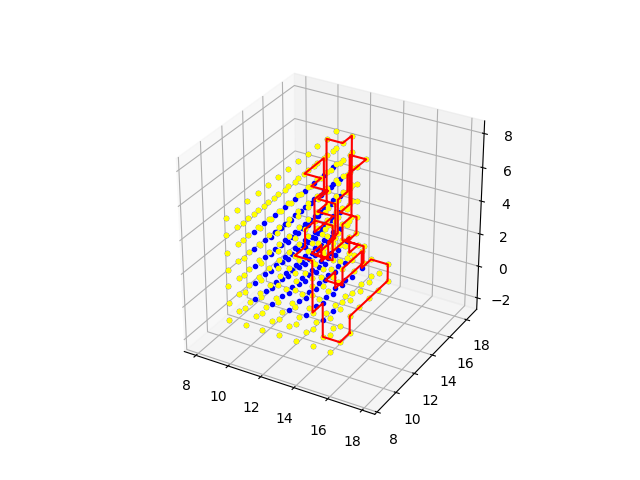

In [113]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_aspect('equal')


# for e in edges:
#     p1,p2 = e
#     x1,y1,z1 = G.mapping[p1]
#     x2,y2,z2 = G.mapping[p2]
#     ax.plot([x1,x2],[y1,y2],[z1,z2], c='b')

for point in f_0:
    x,y,z = G.mapping[point]
    ax.plot([x],[y],[z], c='b', marker='.')

X = []
Y = []
Z = []

for point in max_cycle:
    x,y,z = G.mapping[point]
    X.append(x)
    Y.append(y)
    Z.append(z)

for point in non_complete_nodes:
    x,y,z = G.mapping[point]
    ax.plot([x],[y],[z], c='yellow', marker='.')

ax.plot(X,Y,Z, c='r')
X = np.array(X)
Y = np.array(Y)
Z = np.array(Z)

max_range = np.array([X.max()-X.min(), Y.max()-Y.min(), Z.max()-Z.min()]).max() / 2.0 

mid_x = (X.max()+X.min()) * 0.5
mid_y = (Y.max()+Y.min()) * 0.5
mid_z = (Z.max()+Z.min()) * 0.5
ax.set_xlim(mid_x - max_range, mid_x + max_range)
ax.set_ylim(mid_y - max_range, mid_y + max_range)
ax.set_zlim(mid_z - max_range, mid_z + max_range)

plt.show()



In [68]:
def next_f(f_0,new_f_0,edges):
    augment = False
    L = set()
    new_f = f_0.union(new_f_0)
    for p1 in new_f:
        for p2 in f_0:
            if p1 != p2:
                short_path = nx.shortest_path(G.graph, p1, p2)
                for p in short_path:
                    if p not in f_0:
                        L.add(p)
                        augment = True
                for i in range(len(short_path)-1):
                    v1 = short_path[i]
                    v2 = short_path[i+1]
                    if v1 < v2:
                        edges.add((v1,v2))
                    else:
                        edges.add((v2,v1))
    return edges,augment,f_0,L

In [96]:
cycle = max_cycle
f_0 = set(cycle)
edges = set()
for i in range(len(cycle)-1):
    e1 = cycle[i]
    e2 = cycle[(i+1)]
    if e1 < e2:
        edges.add((e1,e2))
    else:
        edges.add((e2,e1))
new_f_0 = set()
augment = True

while augment:
    print(len(f_0))
    edges,augment,f_0,new_f_0 = next_f(f_0,new_f_0,edges)
    f_0 = f_0.union(new_f_0)
    print("next_f done")
                

94


next_f done
373
next_f done
388
next_f done
390
next_f done


In [105]:
G_flot = nx.Graph()

for e in edges:
    p1,p2 = e
    G_flot.add_edge(p1,p2,capacity=1)

degrees = dict()

for i in range(7):
    degrees[i] = []

for node in G_flot.nodes():
    degrees[G_flot.degree(node)].append(node)

In [110]:
non_complete_nodes = []
for node in G_flot.nodes():
    if G_flot.degree(node) != 6:
        non_complete_nodes.append(node)

In [95]:
#Flot maximal dans un graphe
G_flot = nx.Graph()

for e in edges:
    p1,p2 = e
    G_flot.add_edge(p1,p2,capacity=1)

s = -1
t = -2

for p in f_0:
    G_flot.add_edge(s,p,capacity=0)
    G_flot.add_edge(p,t,capacity=0)

cut_value, (set_S, set_T) = nx.minimum_cut(G_flot, s, t)

# Find the edges in the minimum cut
min_cut_edges = [(u, v) for u, v in G_flot.edges() if u in set_S and v in set_T]


In [97]:
len(min_cut_edges)

390

In [94]:
len(edges)

975

In [67]:
for p1 in tqdm(f_0):
    for p2 in f_0:
        if p1 != p2:
            short_path = nx.shortest_path(G.graph, p1, p2)
            for point in short_path:
                assert point in f_0, point

100%|██████████| 390/390 [00:17<00:00, 22.79it/s]


In [48]:
len(f_0)

94

In [35]:
import cProfile


# Initialize the profiler

profiler = cProfile.Profile()

# Start profiling
profiler.enable()

# Call the method you want to profile
nx.shortest_path(G.graph, 0, 1000)

# Stop profiling
profiler.disable()

# Print the profiling results
profiler.print_stats(sort='time')

         22162 function calls (22161 primitive calls) in 0.013 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.007    0.007    0.013    0.013 unweighted.py:260(_bidirectional_pred_succ)
     4316    0.004    0.000    0.005    0.000 coreviews.py:80(__getitem__)
     4316    0.001    0.000    0.001    0.000 coreviews.py:49(__iter__)
     4316    0.001    0.000    0.001    0.000 coreviews.py:43(__init__)
     4751    0.000    0.000    0.000    0.000 {method 'append' of 'list' objects}
     4316    0.000    0.000    0.000    0.000 {built-in method builtins.iter}
        2    0.000    0.000    0.000    0.000 {built-in method builtins.compile}
        1    0.000    0.000    0.013    0.013 unweighted.py:196(bidirectional_shortest_path)
        1    0.000    0.000    0.013    0.013 2888462059.py:1(<module>)
      2/1    0.000    0.000    0.013    0.013 backends.py:409(__call__)
        2    0.000    0.000    0.000   

In [34]:
f_0

{3626,
 3627,
 3628,
 3629,
 3630,
 3631,
 3632,
 3633,
 3634,
 3635,
 3636,
 3637,
 3638,
 3639,
 3640,
 3641,
 3642,
 3643,
 3644,
 3645,
 3646,
 3647,
 3648,
 3649,
 3650,
 3651,
 3652,
 3653,
 3654,
 3655,
 3656,
 3657,
 3658,
 3659,
 3660,
 3661,
 3662,
 3663,
 3664,
 3665,
 3666,
 3667,
 3668,
 3669,
 3670,
 3671,
 3672,
 3673,
 3674,
 3675,
 3676,
 3677,
 3678,
 3679,
 3680,
 3681,
 3682,
 3683,
 3684,
 3685,
 3686,
 3687,
 3688,
 3689,
 3690,
 3691,
 3692,
 3693,
 3694,
 3695,
 3696,
 3697,
 3698,
 3699,
 3700,
 3701,
 3702,
 3704,
 3705,
 3706,
 3707,
 3708,
 3709,
 3983,
 3984,
 3985,
 3986,
 3987,
 3988,
 3989,
 3990,
 3991,
 3992,
 3993,
 3994,
 3995,
 3996,
 3997,
 3998,
 3999,
 4000,
 4001,
 4002,
 4003,
 4004,
 4005,
 4006,
 4007,
 4008,
 4009,
 4010,
 4011,
 4012,
 4013,
 4014,
 4015,
 4016,
 4017,
 4018,
 4019,
 4020,
 4021,
 4022,
 4023,
 4024,
 4025,
 4026,
 4027,
 4028,
 4029,
 4030,
 4031,
 4032,
 4033,
 4034,
 4035,
 4036,
 4037,
 4038,
 4039,
 4040,
 4041,
 4042,